In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm
from random import*
from google.colab import drive

from scipy.stats import multivariate_normal
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score

# Step 2: Mount Google Drive
drive.mount('/content/drive')

# Step 4: Read the CSV file into a DataFrame
train_data = pd.read_csv("/content/drive/Shareddrives/ML/חלק ב/AirlineSatisfaction Dataset/Xy_train.csv")


Mounted at /content/drive


#Pre-Processing

from tree

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Remove unwanted class
train_data["Class"][train_data["Class"] == "IT IS SO BORING WORKING IN AN AIRPORT'S DESK OH MY GODDDDD"] = None
train_data["Class"][train_data["Class"] == 'Unknown'] = None

#Retriving new values insted of Nones from the coulumn's distribution.
for column in train_data[:-1].columns:train_data[column] = train_data[column].fillna(np.random.choice(train_data[column][~train_data[column].isna()]))

# Encode categorical variables
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
cat = []
for column in train_data.columns:
  if len(train_data[column].unique()) <=30 and column != 'satisfaction':
    cat.append(column)
train_data = pd.get_dummies(train_data, columns=cat)


train_data['satisfaction'] = train_data['satisfaction'].apply(lambda x: x == 'satisfied')

<ipython-input-3-52803c33c928>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Class"][train_data["Class"] == "IT IS SO BORING WORKING IN AN AIRPORT'S DESK OH MY GODDDDD"] = None
<ipython-input-3-52803c33c928>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Class"][train_data["Class"] == 'Unknown'] = None


In [ ]:
y_train = train_data['satisfaction']
X_train = train_data.drop(columns = ['satisfaction'])

In [ ]:
X_train.shape

(9000, 83)

In [ ]:
train_data.shape

(9000, 84)

#DataPrep

**DONT RUN!**

In [ ]:
#Data Prep - Dealing with Nulls
# filling Nulls as described in


train_data['Leg room service'] = train_data['Leg room service'].fillna(train_data['Leg room service'].mode()[0])

train_data['Arrival Delay in Minutes'] = train_data['Arrival Delay in Minutes'].fillna(train_data['Departure Delay in Minutes'] * 0.96)

KeyError: 'Leg room service'

In [ ]:
# Remove rows where any of the specified columns have null values
train_data = train_data.dropna(subset=['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Plane colors', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Seat comfort', 'On-board service',
       'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'satisfaction'])

In [ ]:
#removing Outliers From Age Column
train_data['Age'] = train_data['Age'][train_data['Age']< 120]

In [ ]:
#Part3 - טיפול עם המשתנה class כמו שהוזכר בדוח

# Get the indices of the 'Unknown' category
indices_Unknown = train_data[train_data['Class'] == 'Unknown'].index

# Calculate the size of each third
n = len(indices_Unknown)
one_third_size = n // 3

# Ensure proper handling if the number of 'Unknown' is not perfectly divisible by 3
additional = n % 3

# Split and assign the new categories
train_data.loc[indices_Unknown[:one_third_size], 'Class'] = 'Eco'
train_data.loc[indices_Unknown[one_third_size:2*one_third_size], 'Class'] = 'Business'
train_data.loc[indices_Unknown[2*one_third_size:], 'Class'] = 'Eco Plus'

# If there are additional 'Unknown' entries due to non-divisibility, distribute them evenly
if additional:
    if additional == 1:
        train_data.loc[indices_Unknown[2*one_third_size], 'Class'] = 'Eco'
    elif additional == 2:
        train_data.loc[indices_Unknown[2*one_third_size], 'Class'] = 'Eco'
        train_data.loc[indices_Unknown[2*one_third_size + 1], 'Class'] = 'Business'


data = train_data
# Map 'satisfaction' to binary values
data['satisfaction'] = data['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

bins = range(0, int(data['Age'].max()) + 10 , 10)
data['Age'] = pd.cut(data['Age'], bins)

data['Type of Travel'] = data['Type of Travel']

indices_to_remove = data[data["Class"] == "IT IS SO BORING WORKING IN AN AIRPORT'S DESK OH MY GODDDDD"].index
data = data.drop(indices_to_remove) # Drop the rows by index

#bins = range(0, int(data['Flight Distance'].max()) + 500 , 500) # dont need to split to bins, as recommended by the TA comments
#data['Flight Distance'] = pd.cut(data['Flight Distance'], bins) #בגלל הערה שקבלנו בחלק הראשון


data['Gate location'] = data['Gate location'].map({1.0: 1,2.0: 2, 3.0: 3,4.0: 4,5.0: 5,999.0:None, None:None}) # removing the outliers

bins = range(0, int(train_data['Departure Delay in Minutes'].max()) + 50 , 50)
data['Departure Delay in Minutes'] = pd.cut(data['Departure Delay in Minutes'], bins , include_lowest=True)

bins = range(0, int(train_data['Arrival Delay in Minutes'].max()) + 50 , 50)
data['Arrival Delay in Minutes'] = pd.cut(data['Arrival Delay in Minutes'], bins, include_lowest=True)

# Remove rows where any of the specified columns have null values
data = data.dropna(subset=['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Plane colors', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Seat comfort', 'On-board service',
       'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'satisfaction'])

y_train = data['satisfaction']
X_train = data.drop(columns = ['satisfaction'])

# Labeling

In [ ]:
#Labeling Categorical Data
age_bins = sorted(list(X_train['Age'].unique()))
arrivals_bins = sorted(list(X_train['Arrival Delay in Minutes'].unique()))
departure_bins = sorted(list(X_train['Departure Delay in Minutes'].unique()))
labels_for_age = {interval: i+1 for i, interval in enumerate(age_bins)}
labels_for_arrivals = {interval: i+1 for i, interval in enumerate(arrivals_bins)}
labels_for_departure = {interval: i+1 for i, interval in enumerate(departure_bins)}

In [ ]:
#X_train['Age'] = X_train['Age'].map(labels_for_age)
#X_train['Arrival Delay in Minutes'] = X_train['Arrival Delay in Minutes'].map(labels_for_arrivals)
#X_train['Departure Delay in Minutes'] = X_train['Departure Delay in Minutes'].map(labels_for_departure)

In [ ]:
#Labeling Categorical Data
#gender_map = {'Male': 0, 'Female': 1}
#customer_type_map = {item: i for i, item in enumerate(list(X_train['Customer Type'].unique()))}  #{'Loyal Customer': 0, 'disloyal Customer': 1}
#travel_type_map = {item: i for i, item in enumerate(list(X_train['Type of Travel'].unique()))} #{'Personal Travel': 0, 'Business travel': 1}
#class_map = {Class: i+1 for i, Class in enumerate(list(X_train['Class'].unique()))} #{'Eco': 1, 'Eco Plus': 2, 'Business': 3}

In [ ]:
#Maping each column (Labeling)
#X_train['Gender'] = X_train['Gender'].map(gender_map)
#X_train['Customer Type'] = X_train['Customer Type'].map(customer_type_map)
#X_train['Type of Travel'] = X_train['Type of Travel'].map(travel_type_map)
#X_train['Class'] = X_train['Class'].map(class_map)

#Fitting the NN

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score

#to fix normalization
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

#x train_matrix and y victor

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=1/11, random_state=123)

In [ ]:
#normalization
standard_scaler = StandardScaler()
X_train_s = standard_scaler.fit_transform(X_train)
X_test_s = standard_scaler.transform(X_test)
minmax_scaler = MinMaxScaler()
X_train_n = minmax_scaler.fit_transform(X_train) # we decide to go with the StandardScaler Norrmilaztion!!!

In [ ]:
X_train_s.shape, X_test_s.shape, y_train.shape, y_test.shape

((8181, 83), (819, 83), (8181,), (819,))

In [ ]:
model = MLPClassifier(random_state=123,
                      hidden_layer_sizes=(10),
                      max_iter=1000,
                      activation='relu',
                      learning_rate_init=0.001)


In [ ]:
model.fit(X_train_s, y_train)

MLPClassifier(hidden_layer_sizes=10, max_iter=1000, random_state=123)

In [ ]:
predicted_values_train = model.predict(X_train_s)
predicted_values_test = model.predict(X_test_s)

train_score = accuracy_score(y_train,predicted_values_train)
test_score = accuracy_score(y_test,predicted_values_test)
f1score_train = f1_score(y_train, predicted_values_train)
f1score_test = f1_score(y_test, predicted_values_test)

In [ ]:
print("Accuracy Score")
print("Train Accuracy: " + str(train_score))
print("Test Accuracy: " + str(test_score))

Accuracy Score
Train Accuracy: 0.9508617528419508
Test Accuracy: 0.894993894993895


In [ ]:
print("F1 Score")
print("Train F1 Score: " + str(f1score_train))
print("Test F1 Score: " + str(f1score_test))

F1 Score
Train F1 Score: 0.9434599156118144
Test F1 Score: 0.8720238095238095


# סעיף 3

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


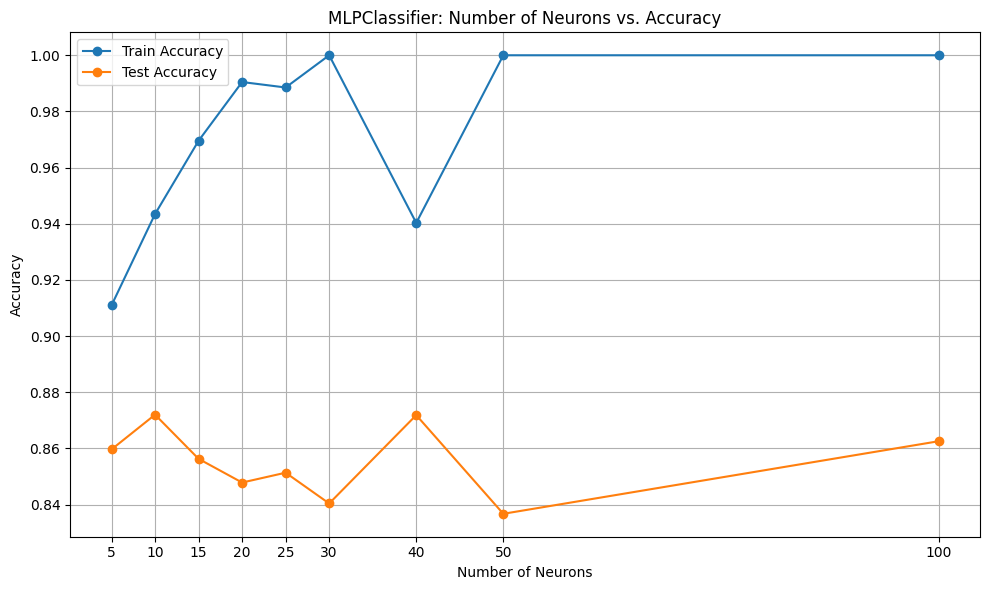

In [ ]:
neuron_numbers = [5,10,15,20,25,30,40,50,100]

# Initialize lists to store train and test scores
train_f1_scores = []
test_f1_scores = []

# Iterate over different numbers of neurons
for neurons in neuron_numbers:
    # Create MLPClassifier with current number of neurons
    mlp = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=1000, random_state=123)

    # Train the model
    mlp.fit(X_train_s, y_train)

    # Predict on train set
    train_preds = mlp.predict(X_train_s)
    train_f1 = f1_score(y_train, train_preds)
    train_f1_scores.append(train_f1)

    # Predict on test set
    test_preds = mlp.predict(X_test_s)
    test_f1 = f1_score(y_test, test_preds)
    test_f1_scores.append(test_f1)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(neuron_numbers, train_f1_scores, marker='o', label='Train Accuracy')
plt.plot(neuron_numbers, test_f1_scores, marker='o', label='Test Accuracy')
plt.title('MLPClassifier: Number of Neurons vs. Accuracy')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.xticks(neuron_numbers)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

20 NEURONS IS THE BEST CHOICE if we use the accuarcy metric <br>
25 neurons is the best choice by f1_score




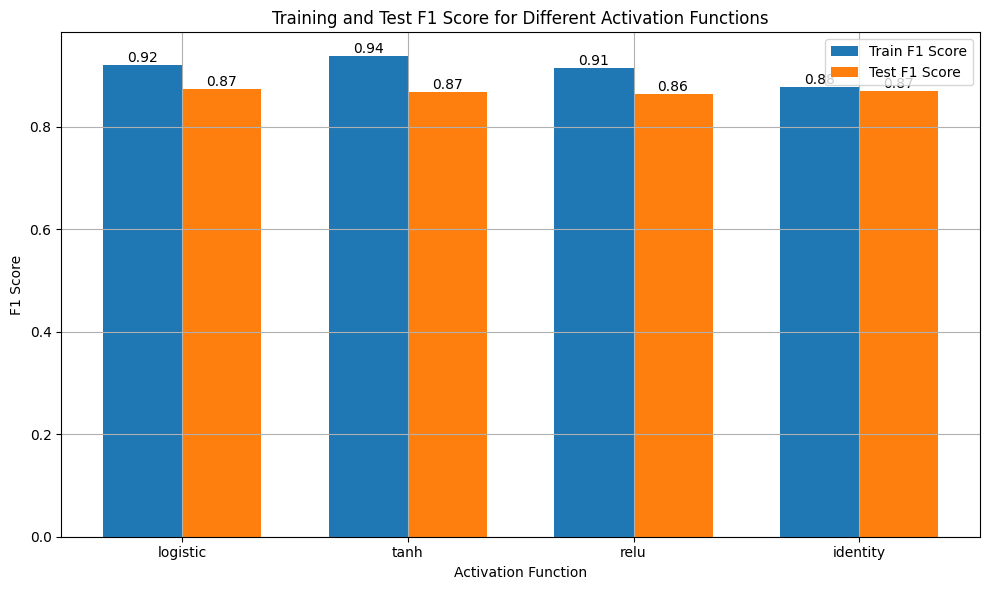

In [ ]:
activations = ['logistic', 'tanh', 'relu', 'identity']
train_f1_scores = []
test_f1_scores = []

# Loop over each activation function
for activation in activations:
    # Create MLPClassifier with specified parameters
    model = MLPClassifier(random_state=123,
                          hidden_layer_sizes=(20,),
                          max_iter=40,
                          activation=activation,
                          verbose=False,
                          learning_rate_init=0.01,
                          early_stopping=True,
                          solver='adam',
                          alpha=10/460)

    # Fit the model on training data
    model.fit(X_train_s, y_train)

    # Predict on training set
    train_preds = model.predict(X_train_s)
    train_f1 = f1_score(y_train, train_preds)
    train_f1_scores.append(train_f1)

    # Predict on test set
    test_preds = model.predict(X_test_s)
    test_f1 = f1_score(y_test, test_preds)
    test_f1_scores.append(test_f1)

# Plotting the results
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(activations))

bars_train = plt.bar(index, train_f1_scores, bar_width, label='Train F1 Score')
bars_test = plt.bar(index + bar_width, test_f1_scores, bar_width, label='Test F1 Score')

# Add labels and text annotations
plt.xlabel('Activation Function')
plt.ylabel('F1 Score')
plt.title('Training and Test F1 Score for Different Activation Functions')
plt.xticks(index + bar_width / 2, activations)
plt.legend()

# Function to annotate bars with F1 score values
def annotate_bars(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Annotate the bars
annotate_bars(bars_train)
annotate_bars(bars_test)

plt.grid(True)
plt.tight_layout()
plt.show()

best activiation function: **logistic** by accuarcy metrics <br>
best activiation function: **relu** by f1 score metric

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


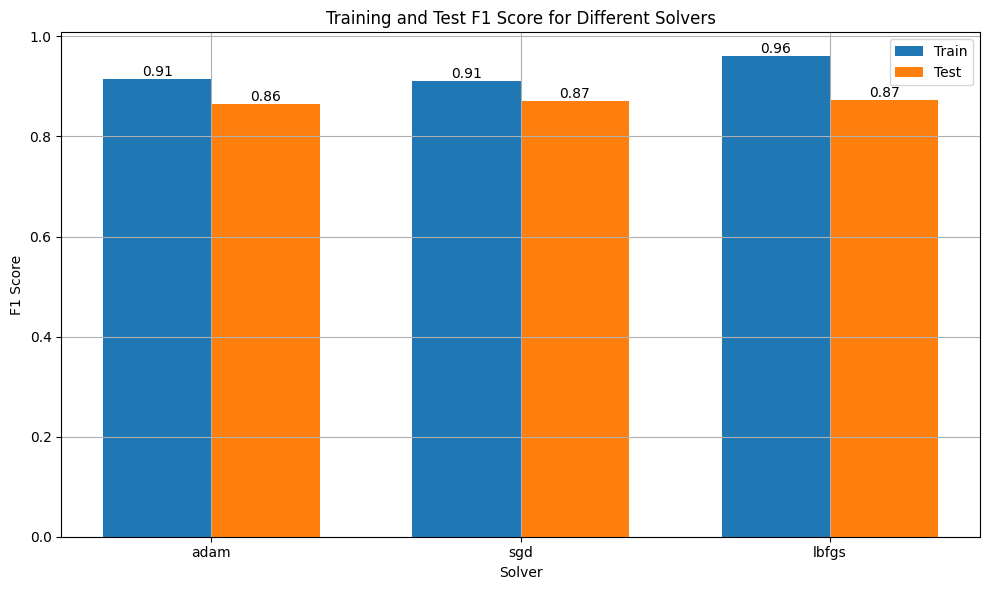

In [ ]:
solvers = ['adam', 'sgd', 'lbfgs']
train_f1_scores = []
test_f1_scores = []

# Loop over each solver
for solver in solvers:
    # Create MLPClassifier with specified parameters
    model = MLPClassifier(random_state=123,
                          hidden_layer_sizes=(20,),
                          max_iter=40,
                          activation='relu',  # Example activation function
                          verbose=False,
                          learning_rate_init=0.01,
                          early_stopping=True,
                          solver=solver,
                          alpha=10/460)

    # Fit the model on training data
    model.fit(X_train_s, y_train)

    # Predict on training set
    train_preds = model.predict(X_train_s)
    train_f1 = f1_score(y_train, train_preds)
    train_f1_scores.append(train_f1)

    # Predict on test set
    test_preds = model.predict(X_test_s)
    test_f1 = f1_score(y_test, test_preds)
    test_f1_scores.append(test_f1)

# Plotting the results
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(solvers))

bars_train = plt.bar(index, train_f1_scores, bar_width, label='Train')
bars_test = plt.bar(index + bar_width, test_f1_scores, bar_width, label='Test')

# Add labels and text annotations
plt.xlabel('Solver')
plt.ylabel('F1 Score')
plt.title('Training and Test F1 Score for Different Solvers')
plt.xticks(index + bar_width / 2, solvers)
plt.legend()

# Function to annotate bars with F1 score values
def annotate_bars(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Annotate the bars
annotate_bars(bars_train)
annotate_bars(bars_test)

plt.grid(True)
plt.tight_layout()
plt.show()

best solver : **lbfgs** <br>
best solver : **lbfgs** also by f1 score

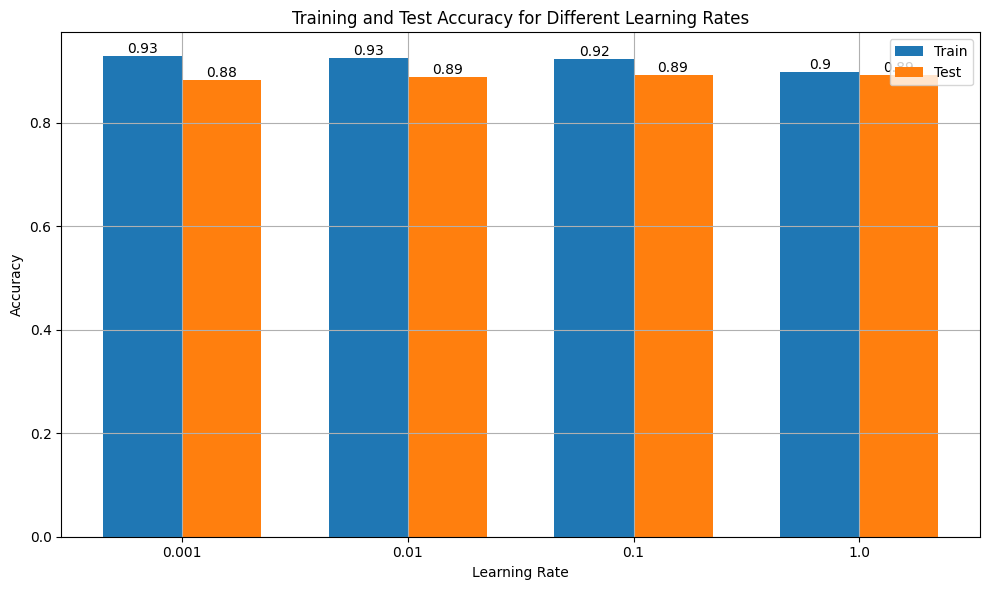

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 1.0]
train_accs = []
test_accs = []

# Loop over each learning rate
for lr in learning_rates:
    # Create MLPClassifier with specified parameters
    model = MLPClassifier(random_state=123,
                          hidden_layer_sizes=(20,),
                          max_iter=40,
                          activation='relu',
                          verbose=False,
                          learning_rate_init=lr,
                          early_stopping=True,
                          solver='adam',
                          alpha=10/460)

    # Fit the model on training data
    model.fit(X_train_s, y_train)

    # Calculate training accuracy
    train_acc = accuracy_score(y_train, model.predict(X_train_s))
    train_accs.append(train_acc)

    # Calculate test accuracy
    test_acc = accuracy_score(y_test, model.predict(X_test_s))
    test_accs.append(test_acc)

# Plotting the results
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(learning_rates))

bars_train = plt.bar(index, train_accs, bar_width, label='Train')
bars_test = plt.bar(index + bar_width, test_accs, bar_width, label='Test')

# Add labels and text annotations
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy for Different Learning Rates')
plt.xticks(index + bar_width / 2, learning_rates)
plt.legend()

# Function to annotate bars with accuracy values
def annotate_bars(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Annotate the bars
annotate_bars(bars_train)
annotate_bars(bars_test)

plt.grid(True)
plt.tight_layout()
plt.show()

the best learning rate: 0.1

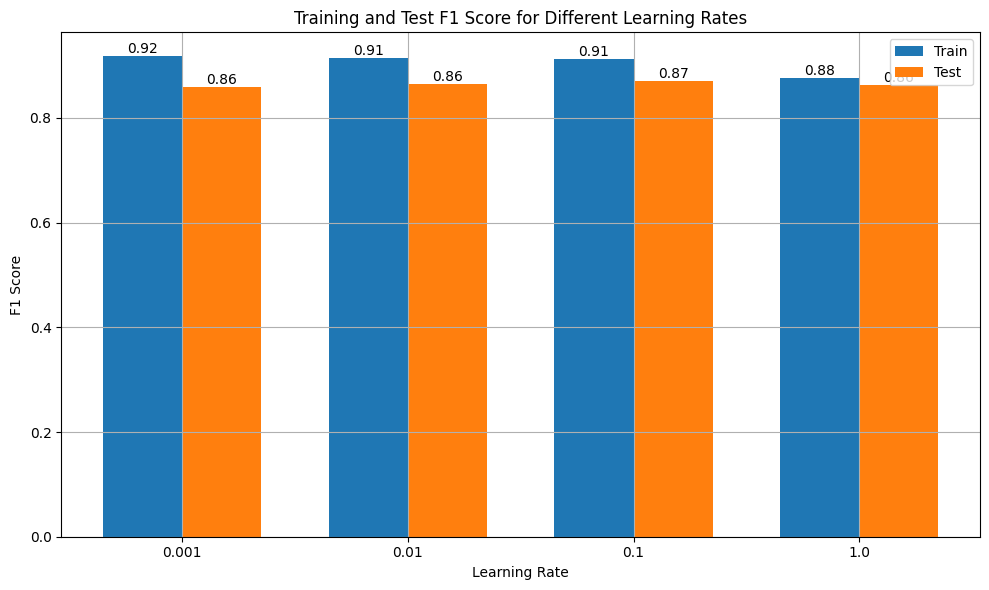

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 1.0]
train_f1_scores = []
test_f1_scores = []

# Loop over each learning rate
for lr in learning_rates:
    # Create MLPClassifier with specified parameters
    model = MLPClassifier(random_state=123,
                          hidden_layer_sizes=(20,),
                          max_iter=40,
                          activation='relu',
                          verbose=False,
                          learning_rate_init=lr,
                          early_stopping=True,
                          solver='adam',
                          alpha=10/460)

    # Fit the model on training data
    model.fit(X_train_s, y_train)

    # Predict on training set
    train_preds = model.predict(X_train_s)
    train_f1 = f1_score(y_train, train_preds)
    train_f1_scores.append(train_f1)

    # Predict on test set
    test_preds = model.predict(X_test_s)
    test_f1 = f1_score(y_test, test_preds)
    test_f1_scores.append(test_f1)

# Plotting the results
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(learning_rates))

bars_train = plt.bar(index, train_f1_scores, bar_width, label='Train')
bars_test = plt.bar(index + bar_width, test_f1_scores, bar_width, label='Test')

# Add labels and text annotations
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')
plt.title('Training and Test F1 Score for Different Learning Rates')
plt.xticks(index + bar_width / 2, learning_rates)
plt.legend()

# Function to annotate bars with F1 score values
def annotate_bars(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Annotate the bars
annotate_bars(bars_train)
annotate_bars(bars_test)

plt.grid(True)
plt.tight_layout()
plt.show()

the best learning rate: **0.01** by f1 score

# סעיף 4

הרצת הרשת הניורנים באמצעות הקונפיגוריצה הנבחרת מהסעיף הקודם <br>  activation='logistic'<br>  
solver='lbfgs''<br>  
learning_rate_init=0.1<br>  
hidden_layer_sizes=(20,)


In [ ]:
optimal_model = MLPClassifier(random_state=123,
                          hidden_layer_sizes=(20,),
                          max_iter=40,
                          activation='logistic',
                          verbose=False,
                          learning_rate_init=0.1,
                          early_stopping=True,
                          solver='lbfgs',
                          alpha=10/460)

In [ ]:
optimal_model.fit(X_train_s, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=0.021739130434782608,
              early_stopping=True, hidden_layer_sizes=(20,),
              learning_rate_init=0.1, max_iter=40, random_state=123,
              solver='lbfgs')

In [ ]:
optimal_predicted_values_train = optimal_model.predict(X_train_s)
optimal_predicted_values_test = optimal_model.predict(X_test_s)

train_score_op = accuracy_score(y_train,optimal_predicted_values_train)
test_score_op = accuracy_score(y_test,optimal_predicted_values_test)
f1score_train_op = f1_score(y_train, optimal_predicted_values_train)
f1score_test_op = f1_score(y_test,optimal_predicted_values_test)

In [ ]:
print("Accuracy Score With the Best Configuration")
print("Train Accuracy: " + str(train_score_op))
print("Test Accuracy: " + str(test_score_op))

Accuracy Score With the Best Configuration
Train Accuracy: 0.9625962596259626
Test Accuracy: 0.8815628815628815


In [ ]:
print("F1 Score With the Best Configuration")
print("Train F1 Score: " + str(f1score_train_op))
print("Test F1 Score: " + str(f1score_test_op))

F1 Score With the Best Configuration
Train F1 Score: 0.9570466030320044
Test F1 Score: 0.8575624082232011


#סעיף 4 לפי f1



הרצת הרשת הניורנים באמצעות הקונפיגוריצה הנבחרת מהסעיף הקודם <br>  activation='relu'<br>  
solver='lbfgs''<br>  
learning_rate_init=0.01<br>  
hidden_layer_sizes=(25,)


In [ ]:
optimal_model_f1 = MLPClassifier(random_state=123,
                          hidden_layer_sizes=(25,),
                          max_iter=40,
                          activation='relu',
                          verbose=False,
                          learning_rate_init=0.01,
                          early_stopping=True,
                          solver='lbfgs',
                          alpha=10/460)

In [ ]:
optimal_model_f1.fit(X_train_s, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=0.021739130434782608, early_stopping=True,
              hidden_layer_sizes=(25,), learning_rate_init=0.01, max_iter=40,
              random_state=123, solver='lbfgs')

In [ ]:
optimal_predicted_f1_values_train = optimal_model_f1.predict(X_train_s)
optimal_predicted_f1_values_test = optimal_model_f1.predict(X_test_s)

train_score_op_f1 = accuracy_score(y_train,optimal_predicted_f1_values_train)
test_score_op_f1 = accuracy_score(y_test,optimal_predicted_f1_values_test)
f1score_train_op_f1 = f1_score(y_train, optimal_predicted_f1_values_train)
f1score_test_op_f1 = f1_score(y_test,optimal_predicted_f1_values_test)

In [ ]:
print("Accuracy Score With the Best Configuration")
print("Train Accuracy: " + str(train_score_op_f1))
print("Test Accuracy: " + str(test_score_op_f1))

Accuracy Score With the Best Configuration
Train Accuracy: 0.9804424886933137
Test Accuracy: 0.8681318681318682


In [ ]:
print("F1 Score With the Best Configuration")
print("Train F1 Score: " + str(f1score_train_op_f1))
print("Test F1 Score: " + str(f1score_test_op_f1))

F1 Score With the Best Configuration
Train F1 Score: 0.9775659001682557
Test F1 Score: 0.8448275862068966


**END**